In [1]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Access a public Github repos
# !rm -rf /content/Brain-Tumor-MRI-Dataset # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/Ultrasound-Breast-Images-for-Breast-Cancer.git

/content
Cloning into 'Ultrasound-Breast-Images-for-Breast-Cancer'...
remote: Enumerating objects: 8797, done.
remote: Total 8797 (delta 0), reused 0 (delta 0), pack-reused 8797
Receiving objects: 100% (8797/8797), 544.46 MiB | 26.40 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (9097/9097), done.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [4]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [5]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["Ultrasound-Breast-Images-for-Breast-Cancer"]

for folder in repository_folder:
    local_path = '/content/' + folder + '/dataset'
    DataSetSummary(local_path, 0)
    local_path = '/content/' + folder + '/sample'
    DataSetSummary(local_path, 0)

Tổng số thư mục: 2
-Thư mục: train, Số tệp: 2
	Tổng số thư mục: 2
	-Thư mục: benign, Số tệp: 4074
	-Thư mục: malignant, Số tệp: 4042
-Thư mục: val, Số tệp: 2
	Tổng số thư mục: 2
	-Thư mục: benign, Số tệp: 500
	-Thư mục: malignant, Số tệp: 400
Tổng số thư mục: 2
-Thư mục: train, Số tệp: 2
	Tổng số thư mục: 2
	-Thư mục: benign, Số tệp: 20
	-Thư mục: malignant, Số tệp: 20
-Thư mục: val, Số tệp: 2
	Tổng số thư mục: 2
	-Thư mục: benign, Số tệp: 20
	-Thư mục: malignant, Số tệp: 20


In [ ]:
#%cd /content/drive/MyDrive/Colab Notebooks/Thesis/04_DWT_Processing

In [6]:
# Set the path to your dataset
# dataset_path = '/content/Brain-Tumor-MRI-Dataset/sample'
dataset_path = '/content/Ultrasound-Breast-Images-for-Breast-Cancer/dataset'

In [7]:
import os

class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path):
    images = []
    # labels = [] # direct
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                img = Image(image_path, class_name)
                images.append(img)
                # labels.append(img.label) # direct
    # return images, labels # direct
    return images

images = load_images_from_folder(dataset_path)
# for class_name, imgs in images.items():
#     for img in imgs:
#         print(f"Path: {img.path}, Label: {img.label}")


Class benign


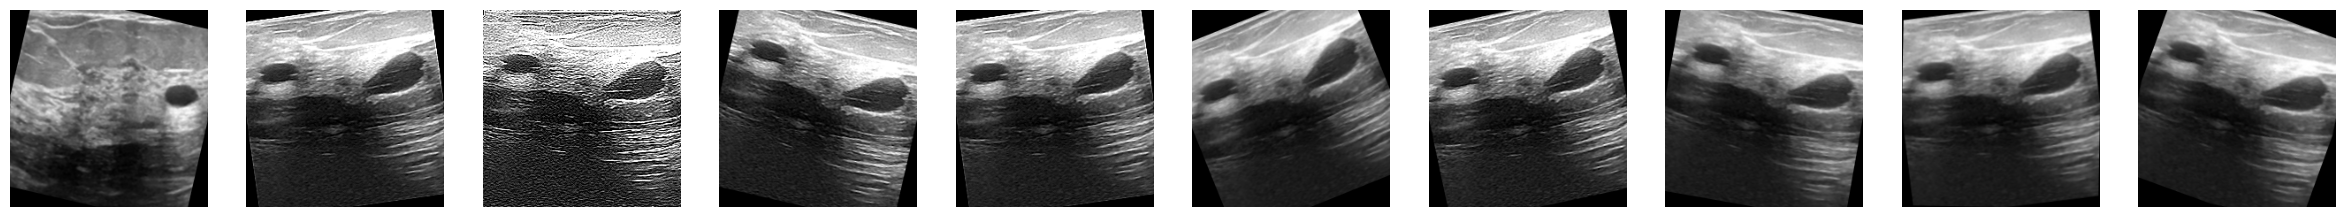

Class malignant


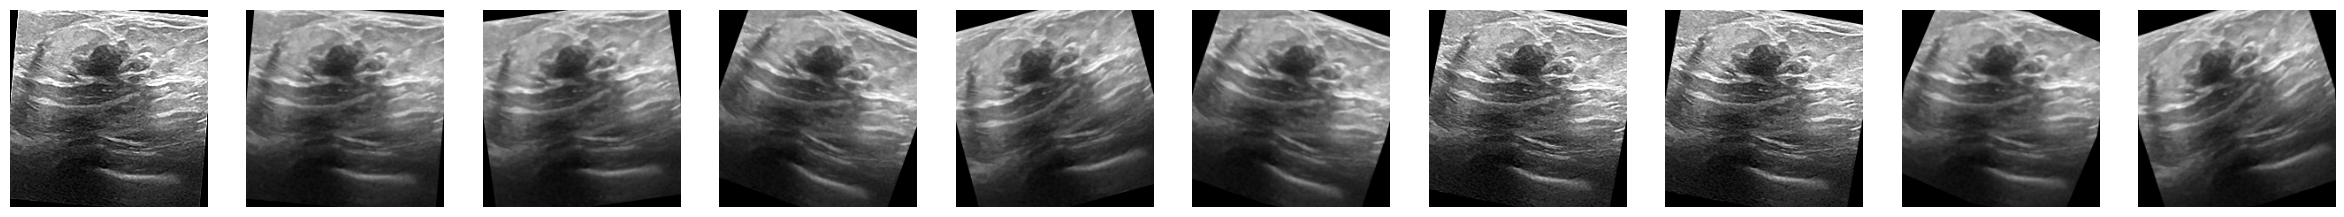

In [8]:
def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images
def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder('/content/Ultrasound-Breast-Images-for-Breast-Cancer/sample/train')
imshow(images, 10)

In [9]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
# image_path = "/content/Brain-Tumor-MRI-Dataset/sample/Training/glioma/Tr-gl_0010.jpg"
image_path = '/content/Ultrasound-Breast-Images-for-Breast-Cancer/dataset/train/malignant/malignant (100)-rotated1-rotated1.png'
image_specifications = get_image_specifications(image_path)
print(image_specifications)

Image Format: PNG
Image Mode: RGB
Image Size: (224, 224) pixels (Width: 224, Height: 224)
Image Colors: [(1, (253, 253, 253)), (4, (251, 251, 251)), (6, (249, 249, 249)), (8, (247, 247, 247)), (8, (245, 245, 245)), (6, (243, 243, 243)), (6, (241, 241, 241)), (8, (239, 239, 239)), (9, (237, 237, 237)), (15, (235, 235, 235)), (5, (233, 233, 233)), (20, (231, 231, 231)), (21, (229, 229, 229)), (20, (227, 227, 227)), (17, (225, 225, 225)), (23, (223, 223, 223)), (32, (221, 221, 221)), (29, (219, 219, 219)), (38, (217, 217, 217)), (29, (215, 215, 215)), (35, (213, 213, 213)), (36, (211, 211, 211)), (49, (209, 209, 209)), (40, (207, 207, 207)), (53, (205, 205, 205)), (60, (203, 203, 203)), (57, (201, 201, 201)), (79, (199, 199, 199)), (70, (197, 197, 197)), (83, (195, 195, 195)), (98, (193, 193, 193)), (113, (191, 191, 191)), (105, (189, 189, 189)), (123, (187, 187, 187)), (155, (185, 185, 185)), (140, (183, 183, 183)), (162, (181, 181, 181)), (166, (179, 179, 179)), (204, (177, 177, 177)), 

## Load dataset

In [10]:
import os
import cv2
import numpy as np
from shutil import copyfile

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)
            dest_item_path = os.path.join(dest_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, dest_item_path, preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                img = cv2.imread(src_item_path)
                if img is not None:
                    img = preprocess_func(img)
                    cv2.imwrite(dest_item_path, img)

In [11]:
# Định nghĩa hàm tiền xử lý của bạn ở đây
# def preprocess_func(img):
#     # TODO: Thêm bước tiền xử lý của bạn ở đây
#     return img
import pywt
def preprocess_func(image):
    # Unsharp Masking
    blurred = cv2.GaussianBlur(image, (0, 0), 3)
    unsharp_mask = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

    # Bilateral Filter Denoising
    denoised_image = cv2.bilateralFilter(unsharp_mask, d=9, sigmaColor=75, sigmaSpace=75)

    # return result
    return denoised_image

In [13]:
# Sử dụng
dataset_path = '/content//Ultrasound-Breast-Images-for-Breast-Cancer/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/05_08_unsharpMasking'

preprocess_and_copy(dataset_path, output_path, preprocess_func)


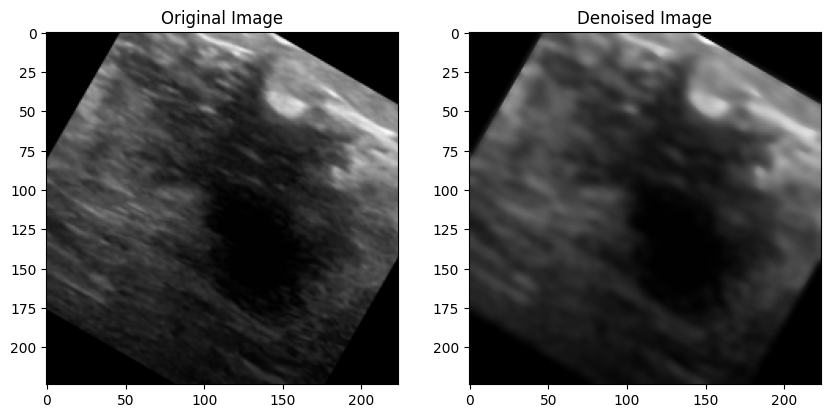

In [12]:
import cv2
import numpy as np
import pywt
# Đọc ảnh cần xử lý
image_path = '/content/Ultrasound-Breast-Images-for-Breast-Cancer/dataset/train/malignant/malignant (137)-rotated32.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Áp dụng biến đổi sóng và lọc nhiễu cho ảnh
denoised_image = preprocess_func(img)


# Hiển thị ảnh gốc và ảnh đã xử lý bằng Matplotlib
plt.figure(figsize=(10, 5))

# Ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Ảnh đã xử lý
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.show()
